In [281]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('cost.xlsx')
df.head()

,Category,City,Country,Item,Cost
0,Date night,Barcelona,Spain,Dinner,69.38
1,Date night,Barcelona,Spain,Drinks at Dinner,21.28
2,Date night,Barcelona,Spain,Cinema entry,11.87
3,Party night,Barcelona,Spain,Taxi,10.92
4,Party night,Barcelona,Spain,Big Mac,4.75


In [282]:
def build_data(dfd):
    dfp = dfd.pivot_table(index='City', columns='Item', values='Cost')
    dfp['Total'] = dfp.sum(axis=1)
    dfp = dfp.round(0).sort_values(by=['Total'])
    cities = list(dfp.index) 
    activities = list(dfp.columns)
    data = dfp.values
    return (cities, activities, data)

In [283]:
import seaborn as sns
%matplotlib inline

def plot_night(cities, activities, data):
    dfh = pd.DataFrame(data, index=cities, columns=activities)
    sns.heatmap(dfh, annot=True, fmt='g', cmap='Reds')

In [284]:
def heatmap(dfd):
    cities, activities, data = build_data(dfd)
    plot_night(cities, activities, data)

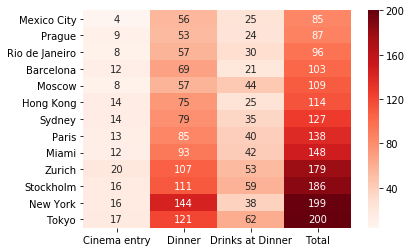

In [285]:
heatmap(df[df.Category == 'Date night'])

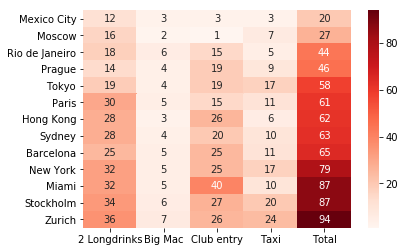

In [286]:
heatmap(df[df.Category == 'Party night'])

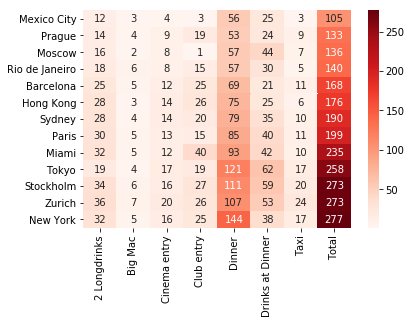

In [287]:
heatmap(df)

In [288]:
# TODO in Dash
# prepare template where we show initial image, data created
# TODO group dynamically by entertainment categories - food, alcohol, taxi, entertainment

In [289]:
# scatter plot cost of party vs. cost of date
df.head()
totals = df.groupby(['Category', 'City'])['Cost'].sum().reset_index()
df_scatter = totals.pivot_table(index='City', columns='Category', values='Cost').reset_index()
df_scatter

Category,City,Date night,Party night
0,Barcelona,102.53,65.01
1,Hong Kong,113.63,62.33
2,Mexico City,84.82,20.35
3,Miami,148.01,87.18
4,Moscow,109.41,26.56
5,New York,198.81,78.62
6,Paris,138.35,60.83
7,Prague,86.52,46.29
8,Rio de Janeiro,95.70,44.07
9,Stockholm,185.83,86.97


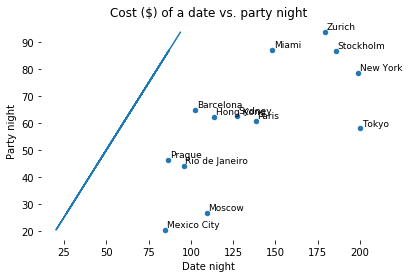

In [299]:

# Partying is cheaper than dating around the world
# Partying in Tokyo and BCN have average costs, but dining will cost twice in Tokyo
# The line shows where cities whose party and dating costs are equal would be placed
df_scatter.plot.scatter(x='Date night', y='Party night')
plt.plot(df_scatter['Party night'], df_scatter['Party night'], linestyle='-')
plt.title('Cost ($) of a date vs. party night')
plt.box(False)

def annotate_city(city):
    df_city = df_scatter[df_scatter.City == city]
    city = df_city.iloc[0]
    plt.text(city['Date night']+1, city['Party night']+1, city.City, fontsize=9)
for city in df_scatter.City:
    annotate_city(city)